<a href="https://colab.research.google.com/github/MichelleNkatha/Mall_customers_clustering/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q2-Clean data and carry out Exploratory Data Analysis**

---



In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving Mall_Customers.csv to Mall_Customers.csv


Data Understanding

---



In [ ]:
#1. Data Understanding

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
#Retrieve descriptive statistics about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Get the shape of the dataset-number of rows and columns
df.shape

(200, 5)

In [ ]:
#Describe the columns in the dataset.
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#How many unique values are there in the dataset
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Cleaning Data

---



In [ ]:
#Cleaning data:
#Step 1- view number and names of columns, number of rows, number of non-null rows per column and column datatype
df.info()
#No missing values were found in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Exploratory Data Analysis

---



In [ ]:
#Exploratory Data Analysis
#Relationship Analysis

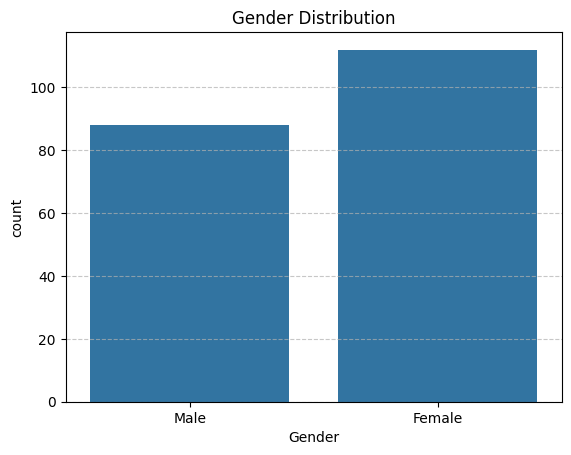

In [ ]:
#1. Gender distribution:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#There are more female shoppers in the mall than male shoppers.

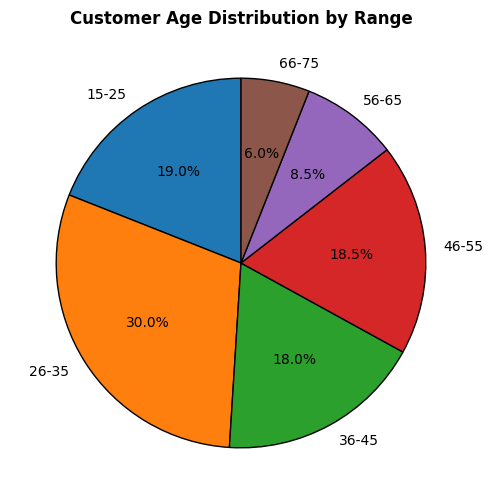

In [ ]:
#2. Age distribution:

bins = [15,25,35,45,55,65,75]
labels = ['15-25','26-35','36-45','46-55','56-65','66-75']
age_groups_temp = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
age_counts = age_groups_temp.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.title('Customer Age Distribution by Range', fontsize=12, fontweight='bold')
plt.show()

#Most customers are between 25–45 years old, indicating a relatively young customer base.


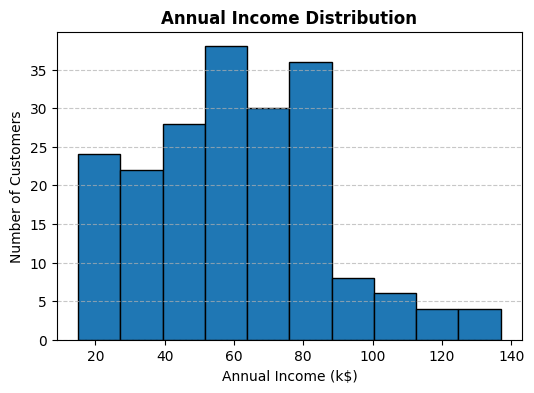

In [ ]:
#3. Annual Income Distribution:

plt.figure(figsize=(6,4))
plt.hist(df['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Annual Income Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most customers earn between 40k and 80k per year, meaning the mall attracts mainly middle-income customers.


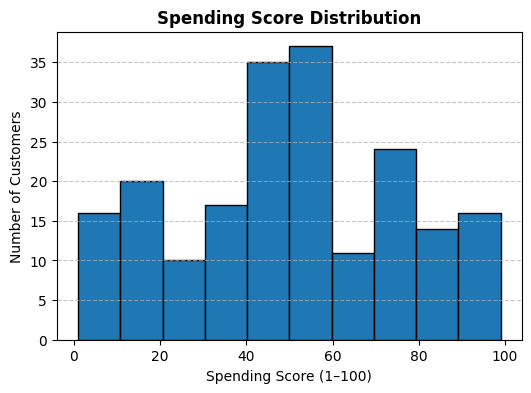

In [ ]:
#4. Spending Score Distribution:

plt.figure(figsize=(6,4))
plt.hist(df['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Spending Score Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Spending Score (1–100)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Spending scores vary widely from 1 to 100, and the mean therefore customers have very different spending behaviors.



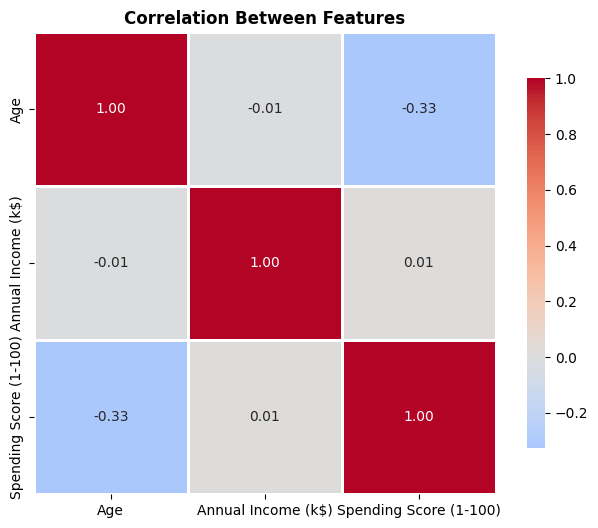

In [ ]:
#5. Correlation Matrix:
numerical_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Features', fontsize=12, fontweight='bold')
plt.show()

#Annual Income and Spending Score have virtually no correlation (0.01), meaning a customer's income does not predict their spending behavior.
#This independence makes them ideal for 2D clustering.
#Additionally, Age shows weak negative correlation with Spending Score (-0.33), suggesting younger customers tend to spend slightly more, but this relationship is not strong enough to be the primary clustering basis.

**Cluster 1(-0.33)**

*Low age,High Spending score*
May be students or youth starting on their careers who are at time considered impulsive shoppers or are into trends


---


 *Engagement ideas*


*   Student discounts
*   loyalty points that can be redeemed
*   Running flash sales
*  social media based contests





**cluster 2(-0.33)**
*High age,low spending score*
Budget shoppers with varying income whoare typically value driven


---


Engagement ideas


*   Loyalty Programs in terms of cashback
*   Free Delivery
*   Targeted SMS discounts






**Cluster 3(0.01)**
*High Income,High spending score*
The upper class where they are luxury enthusiasts.


---

Engangement Ideas


*   Personalised shopping experiences eg shoppers
*  Exclusive access
*   Having luxury brands






**CLUSTER 4(0.01)**
*High Income,Low spending score*
Wealthy customers who spend averagely

---
Engagement ideas

*   Excusive members sale
*   Advertising product quality
*   Brand trust
*   Premium loyalty tiers







**Cluster 5(1.00)**
*Middle income, Moderate spending*
Just average shopper with average income who are consistent and speady they don,t spend too much nor too little

---
Engagement ideas


*   Family packages
*   Seasonal promotions like christmas
*   Hire purchase on things like electronics
*   Mall loyalty card programs on services like parking according to how much you've spent in the mall






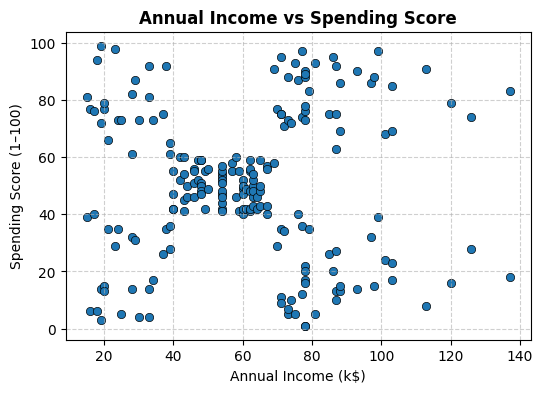

In [ ]:
#6. Annual Income vs Spending Score:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=df, edgecolor='black')
plt.title('Annual Income vs Spending Score', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Customers with similar income show very different spending scores.

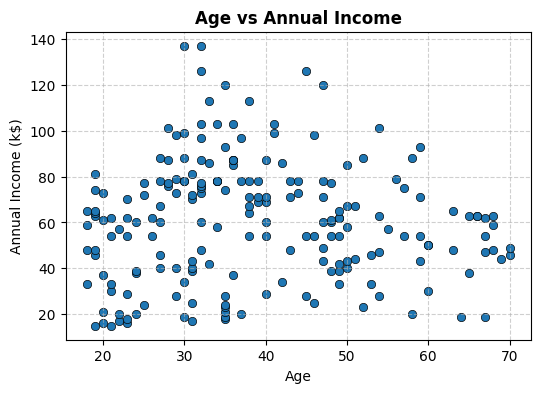

In [ ]:
#7. Age vs Annual Income
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, edgecolor='black')
plt.title('Age vs Annual Income', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Income varies across all age groups with no strong pattern.